In [ ]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_dir = Path("/content/drive/MyDrive/Colab Notebooks/Energy Forecasting/data")

In [ ]:
data = pd.read_csv(data_dir / "demand.csv")
demand_data = data[['datetime', 'Demand (MW)']].copy()
demand_data.head()

,datetime,Demand (MW)
0,2020-01-01 00:00:00,445.8
1,2020-01-01 01:00:00,424.5
2,2020-01-01 02:00:00,423.5
3,2020-01-01 03:00:00,418.8
4,2020-01-01 04:00:00,414.8


In [ ]:
demand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27723 entries, 0 to 27722
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     27723 non-null  object 
 1   Demand (MW)  27555 non-null  float64
dtypes: float64(1), object(1)
memory usage: 433.3+ KB


In [ ]:
demand_data["datetime"] = pd.to_datetime(demand_data["datetime"])
# convert the datetime into the hourly period
# demand_data["datetime"] = demand_data["datetime"].dt.to_period("H")

In [ ]:
demand_data = demand_data.set_index("datetime")

In [ ]:
display(demand_data.head())
display(demand_data.tail())

,Demand (MW)
datetime,
2020-01-01 00:00:00,445.8
2020-01-01 01:00:00,424.5
2020-01-01 02:00:00,423.5
2020-01-01 03:00:00,418.8
2020-01-01 04:00:00,414.8


,Demand (MW)
datetime,
2023-02-28 19:00:00,NaN
2023-02-28 20:00:00,NaN
2023-02-28 21:00:00,NaN
2023-02-28 22:00:00,NaN
2023-02-28 23:00:00,NaN


In [ ]:
train_data = demand_data.dropna().copy()
test_data = demand_data[demand_data.isnull().any(axis=1)].copy()

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27555 entries, 2020-01-01 00:00:00 to 2023-02-21 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Demand (MW)  27555 non-null  float64
dtypes: float64(1)
memory usage: 430.5 KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2023-02-22 00:00:00 to 2023-02-28 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Demand (MW)  0 non-null      float64
dtypes: float64(1)
memory usage: 2.6 KB


**We have train data and we have to predict for next 7 days demand forecast i.e 24*7=168 entries**

## Let's observe the yearwise trend data

In [ ]:
train_data.head()

,Demand (MW)
datetime,
2020-01-01 00:00:00,445.8
2020-01-01 01:00:00,424.5
2020-01-01 02:00:00,423.5
2020-01-01 03:00:00,418.8
2020-01-01 04:00:00,414.8


In [ ]:
train_data["year"] = train_data.index.year
train_data["month"] = train_data.index.month
train_data["day"] = train_data.index.day
train_data["hour"] = train_data.index.hour
train_data.head()

,Demand (MW),year,month,day,hour
datetime,,,,,
2020-01-01 00:00:00,445.8,2020,1,1,0
2020-01-01 01:00:00,424.5,2020,1,1,1
2020-01-01 02:00:00,423.5,2020,1,1,2
2020-01-01 03:00:00,418.8,2020,1,1,3
2020-01-01 04:00:00,414.8,2020,1,1,4


In [ ]:
df_reset = train_data.reset_index().rename(columns={'index' : 'datetime'})
df_reset["datetime"] = pd.to_datetime(df_reset["datetime"])
display(df_reset.head())

,datetime,Demand (MW),year,month,day,hour
0,2020-01-01 00:00:00,445.8,2020,1,1,0
1,2020-01-01 01:00:00,424.5,2020,1,1,1
2,2020-01-01 02:00:00,423.5,2020,1,1,2
3,2020-01-01 03:00:00,418.8,2020,1,1,3
4,2020-01-01 04:00:00,414.8,2020,1,1,4


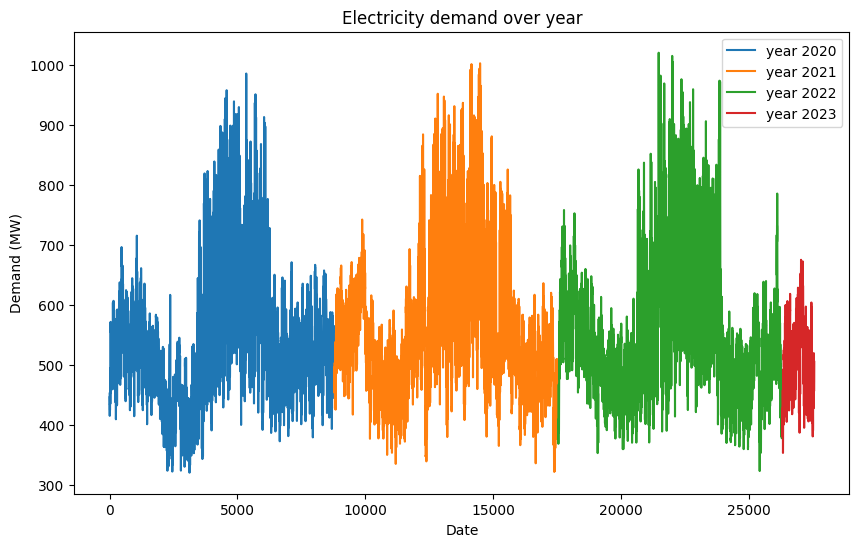

In [ ]:
plt.figure(figsize=(10, 6))
for year in df_reset['year'].unique():
  df_year = df_reset[df_reset["year"] == year]
  sns.lineplot(x=df_year.index, y = df_year["Demand (MW)"], label=f"year {year}")

plt.xlabel("Date")
plt.ylabel("Demand (MW)")
plt.title("Electricity demand over year")
plt.legend()

plt.show()

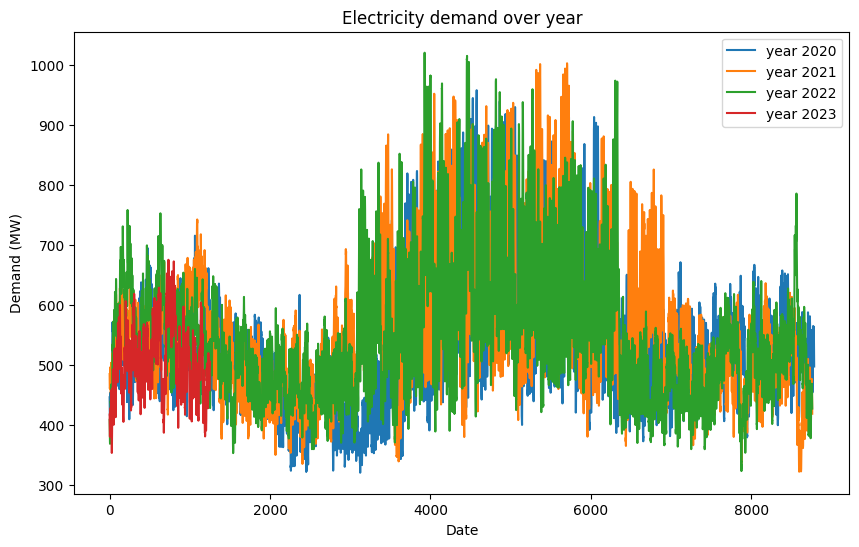

In [ ]:
plt.figure(figsize=(10, 6))
for year in df_reset['year'].unique():
  df_year = df_reset[df_reset["year"] == year].copy().reset_index()
  sns.lineplot(x=df_year.index, y = df_year["Demand (MW)"], label=f"year {year}")

plt.xlabel("Date")
plt.ylabel("Demand (MW)")
plt.title("Electricity demand over year")
plt.legend()

plt.show()

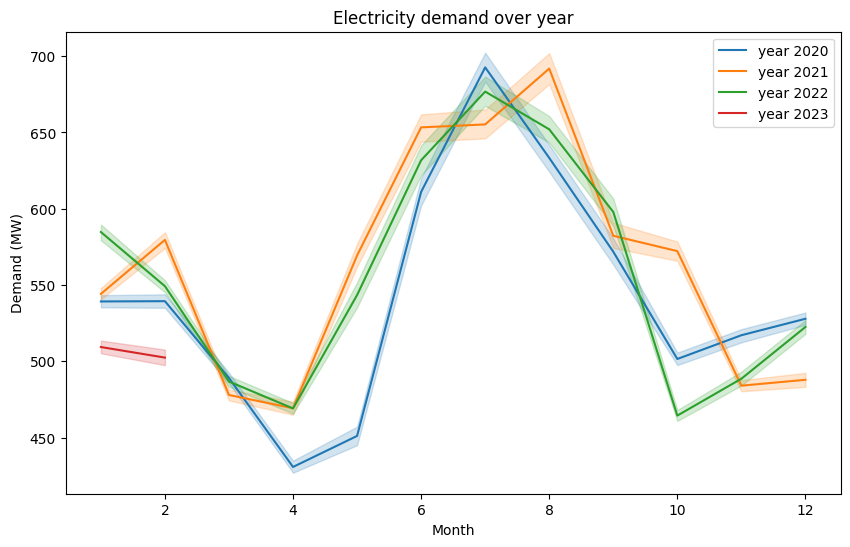

In [ ]:
plt.figure(figsize=(10, 6))
for year in df_reset['year'].unique():
  df_year = df_reset[df_reset["year"] == year].copy().reset_index()
  sns.lineplot(x=df_year.month, y = df_year["Demand (MW)"], label=f"year {year}")

plt.xlabel("Month")
plt.ylabel("Demand (MW)")
plt.title("Electricity demand over year")
plt.legend()

plt.show()

In [ ]:
train_data.head()

,Demand (MW),year,month,day,hour
datetime,,,,,
2020-01-01 00:00:00,445.8,2020,1,1,0
2020-01-01 01:00:00,424.5,2020,1,1,1
2020-01-01 02:00:00,423.5,2020,1,1,2
2020-01-01 03:00:00,418.8,2020,1,1,3
2020-01-01 04:00:00,414.8,2020,1,1,4


In [ ]:
# conver the training and test data to hourly period
train_data.index = pd.to_datetime(train_data.index)
train_data.index = train_data.index.to_period("H")

test_data.index = pd.to_datetime(test_data.index)
test_data.index = test_data.index.to_period("H")

In [ ]:
train_data.head()

,Demand (MW),year,month,day,hour
datetime,,,,,
2020-01-01 00:00,445.8,2020,1,1,0
2020-01-01 01:00,424.5,2020,1,1,1
2020-01-01 02:00,423.5,2020,1,1,2
2020-01-01 03:00,418.8,2020,1,1,3
2020-01-01 04:00,414.8,2020,1,1,4


In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(index=train_data.index, constant=True, order=3, drop=True)

X = dp.in_sample()

X.head()

,const,trend,trend_squared,trend_cubed
datetime,,,,
2020-01-01 00:00,1.0,1.0,1.0,1.0
2020-01-01 01:00,1.0,2.0,4.0,8.0
2020-01-01 02:00,1.0,3.0,9.0,27.0
2020-01-01 03:00,1.0,4.0,16.0,64.0
2020-01-01 04:00,1.0,5.0,25.0,125.0


In [ ]:
from sklearn.linear_model import LinearRegression

y = train_data["Demand (MW)"]

model = LinearRegression(fit_intercept = False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = X.index)

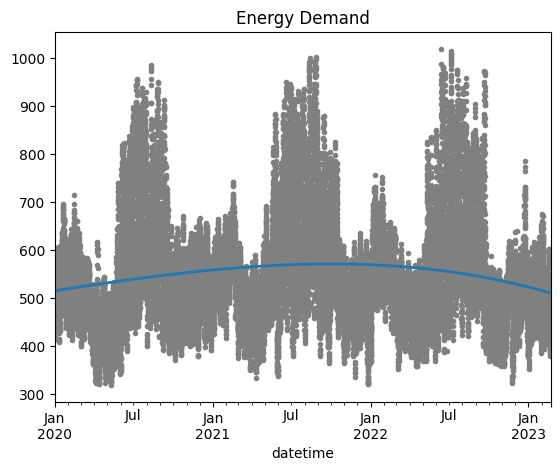

In [ ]:
num_of_hours_to_plot = 86400
ax = train_data["Demand (MW)"][:num_of_hours_to_plot].plot(style=".", color="0.5", title="Energy Demand")
_ = y_pred[:num_of_hours_to_plot].plot(ax=ax, linewidth=2, label="trend")

In [ ]:
# we have to predict for next whole week; 7*24 = 168
X = dp.out_of_sample(168)
y_fore = pd.Series(model.predict(X), index=X.index)
y_fore.head()

2023-02-22 00:00    511.025984
2023-02-22 01:00    511.015115
2023-02-22 02:00    511.004245
2023-02-22 03:00    510.993374
2023-02-22 04:00    510.982502
Freq: H, dtype: float64

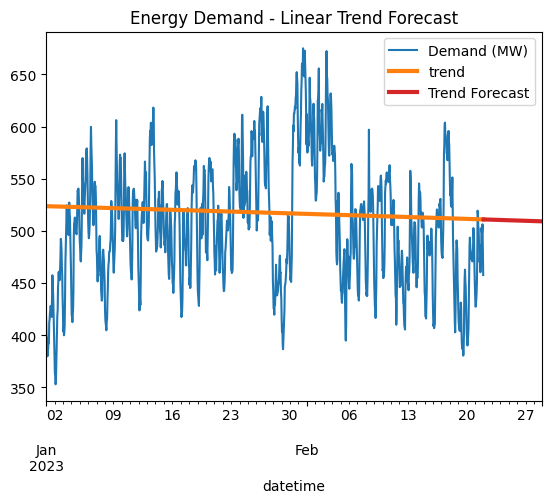

In [ ]:
ax = train_data["2023" : ]["Demand (MW)"].plot(title = "Energy Demand - Linear Trend Forecast")
ax = y_pred["2023" : ].plot(ax=ax, linewidth=3, label="trend")
ax = y_fore.plot(ax=ax, linewidth = 3, label = "Trend Forecast", color="C3")
_ = ax.legend()